In [1]:
%pip install pandas
%pip install matplotlib
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine_data = pd.read_csv('winequalityN.csv')

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
print("Number of NA values per column:\n-------------------------------------")
for column in wine_data.columns:
    count_nulls = wine_data[column].isna().sum()
    print(f'{column}: {count_nulls}')
#     if count_nulls > 0:
#         df[column].fillna(0, inplace=True)

Number of NA values per column:
-------------------------------------
type: 0
fixed acidity: 10
volatile acidity: 8
citric acid: 3
residual sugar: 2
chlorides: 2
free sulfur dioxide: 0
total sulfur dioxide: 0
density: 0
pH: 9
sulphates: 4
alcohol: 0
quality: 0


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


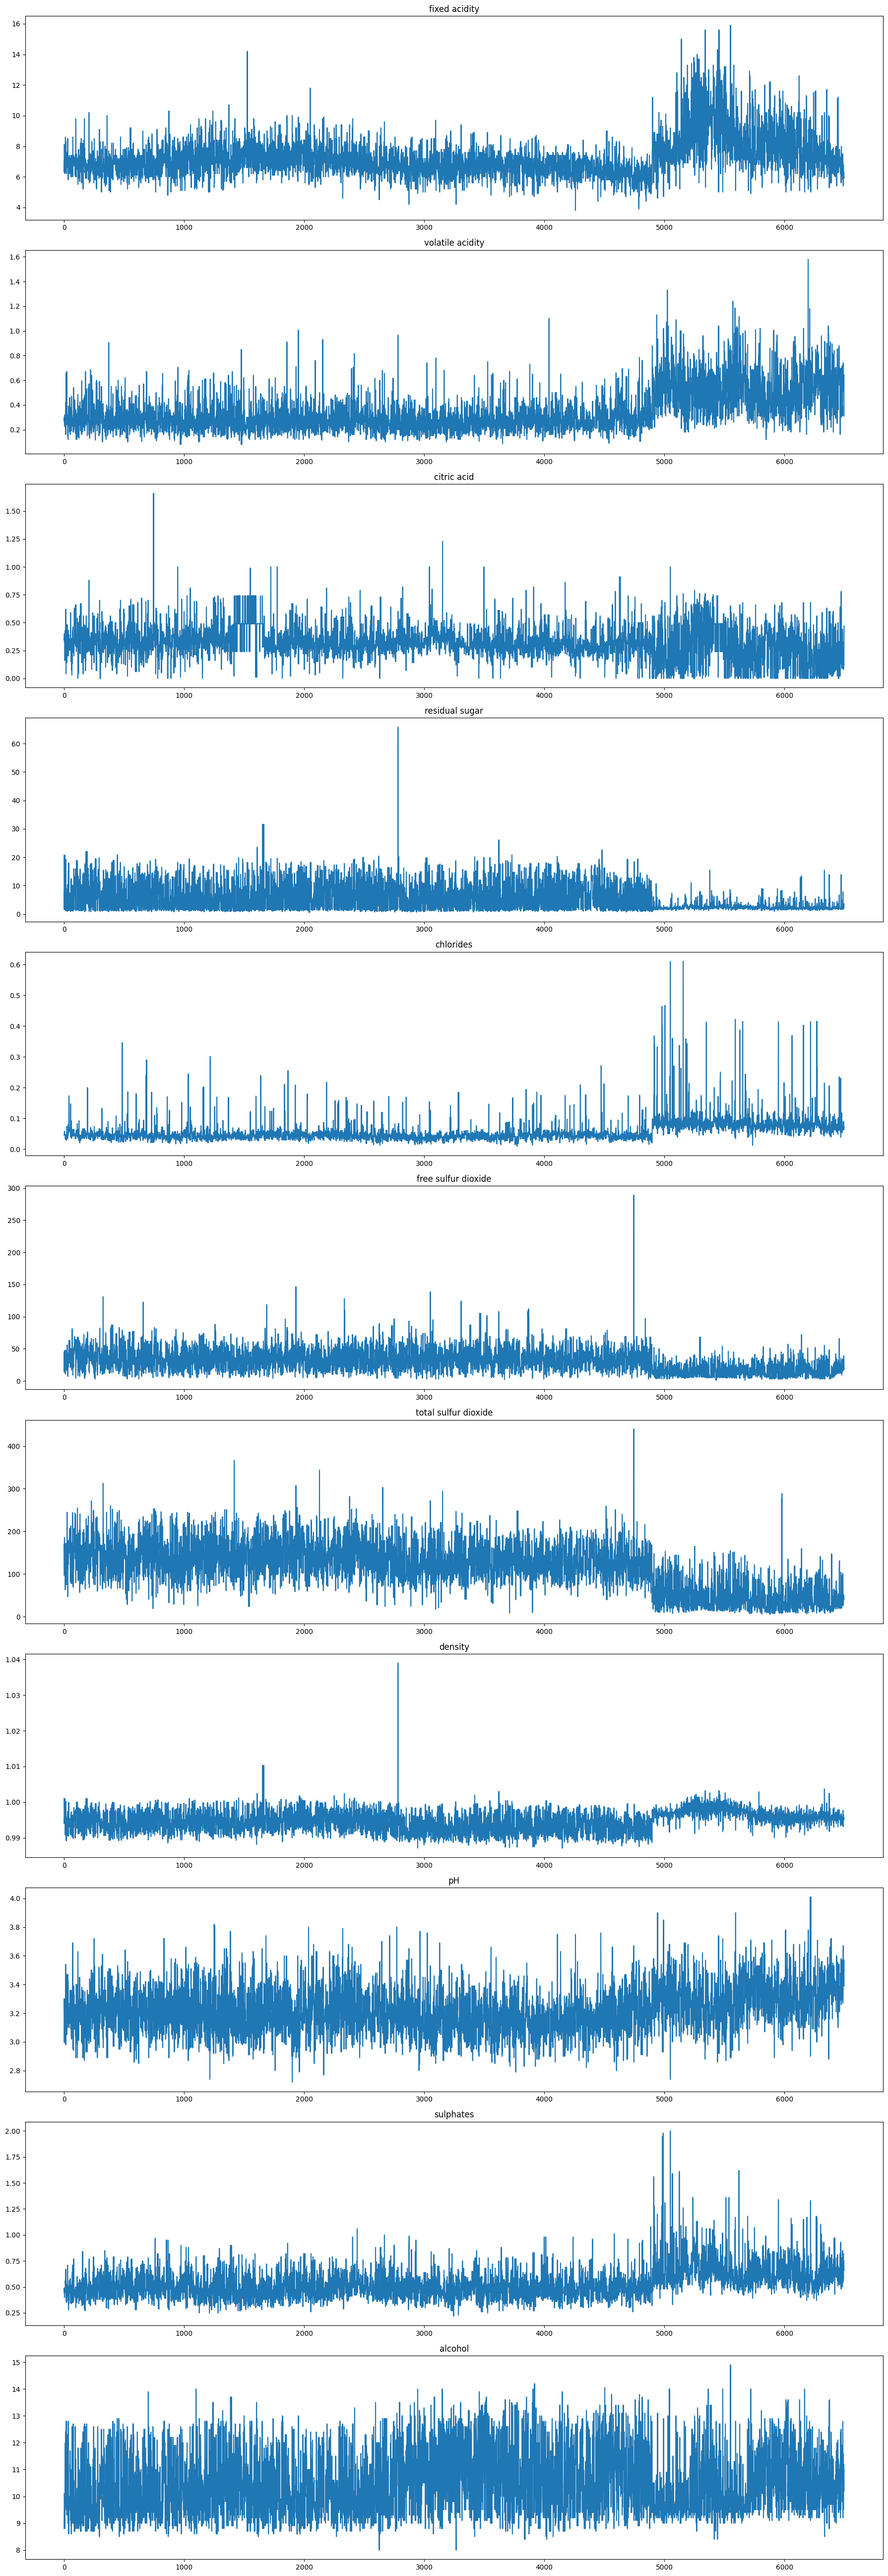

In [8]:
plt.rcParams["figure.figsize"] = (18, 52)
fig, axes = plt.subplots(nrows=11, ncols=1)

for index, column in enumerate(wine_data.columns):
    if column == 'type' or column == 'quality':
        continue
    wine_data[column].plot(ax=axes[index-1], title=column)

plt.tight_layout()

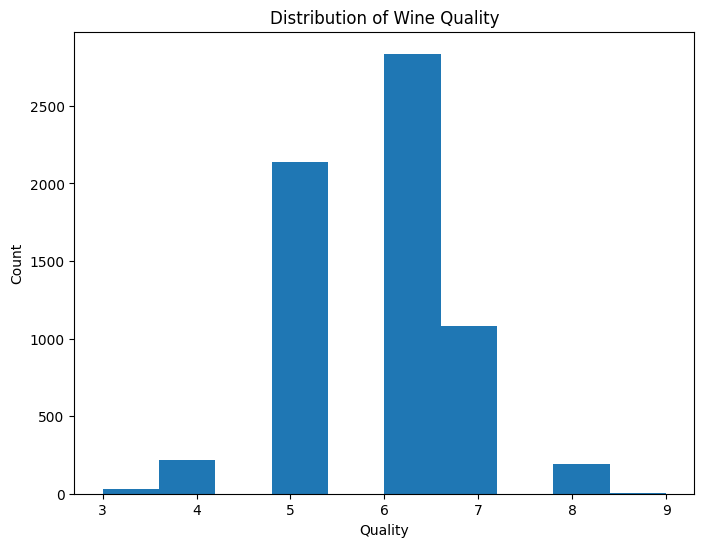

In [9]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.hist(wine_data['quality'])
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [10]:
# Check the distribution of wine quality values
quality_distribution = wine_data['quality'].value_counts().sort_index()

quality_distribution

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Handle missing values by filling them with the mean of each column
wine_data_filled = wine_data.fillna(wine_data.mean())

# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
wine_data_filled['type'] = label_encoder.fit_transform(wine_data_filled['type'])

# Split the dataset into features and target
X = wine_data_filled.drop('quality', axis=1)
y = wine_data_filled['quality']

# Apply SMOTE to generate synthetic samples for the minority class (quality = 9)
smote = SMOTE(sampling_strategy={9: 500}, k_neighbors=4, random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Check the distribution of wine quality values after applying SMOTE
resampled_quality_distribution = pd.Series(y_resampled).value_counts().sort_index()

resampled_quality_distribution

TypeError: Could not convert ['whitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhiteredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredred'] to numeric

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=10)

# Splitting the original data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.25, random_state=10)

# Define the classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Naive Bayes": GaussianNB()
}

# Function to train and evaluate classifiers
def train_evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
    
    return accuracies

# Train and evaluate classifiers on resampled data
print("Performance on Resampled Data:")
resampled_accuracies = train_evaluate_classifiers(classifiers, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)
print("\nPerformance on Original Data:")
original_accuracies = train_evaluate_classifiers(classifiers, X_train_original, y_train_original, X_test_original, y_test_original)

: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each classifier
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Different solvers are suited to different penalty options
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

# Function to perform grid search hyperparameter optimization
def hyperparameter_optimization(classifiers, param_grids, X_train, y_train):
    best_params = {}
    for name, clf in classifiers.items():
        print(f"Optimizing {name}...")
        
        # Grid search for hyperparameters
        grid_search = GridSearchCV(clf, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        
        # Store best parameters
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}\n")
    
    return best_params

# Perform hyperparameter optimization on the resampled data
optimized_parameters = hyperparameter_optimization(classifiers, param_grids, X_train_resampled, y_train_resampled)

: 

: 